# **Zomato Data Analysis Using Python**

### **Defining the Problem Statement:**
- Do more restaurants provide online delivery compared to offline services?
- Which types of restaurants are most favored by general public?
- What price range do couples prefer for dining out?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Zomato-data.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### **Data Cleaning and Preparation**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


#### **Checking for Missing Values**

In [4]:
print(df.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


**No missing values**

#### **Understanding Columns**
- name: Name of the restraunt
- online_order: yes/no - Indicates whether the restaurant accepts online orders
- book_table: yes/no - Indicates whether the restaurant allows table reservations
- rate: Average rating of the restaurant, usually given by customers
- votes: Number of votes or ratings submitted by customers
- approx_cost(for two people): Estimated cost for two people to dine at the restaurant, usually in the local currency
- listed_in(type): The category of the restaurant - "Buffet", "Cafes", "Dining", "others"

#### **Analysing Categorical Columns**
- online_order, book_table, listed_in(type)

In [5]:
cat_cols = ["online_order", "book_table", "listed_in(type)"]
for col in cat_cols:
    print(df[col].unique())

['Yes' 'No']
['Yes' 'No']
['Buffet' 'Cafes' 'other' 'Dining']


**No inconsistent values in categorical columns**

#### **Converting rate column to float by removing denominator characters**

In [6]:
df['rate'] = df['rate'].str.replace('/5', '').str.strip()              
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [8]:
df["rate"].isnull().sum()

np.int64(0)

### **Restaurants accepting Online Orders**

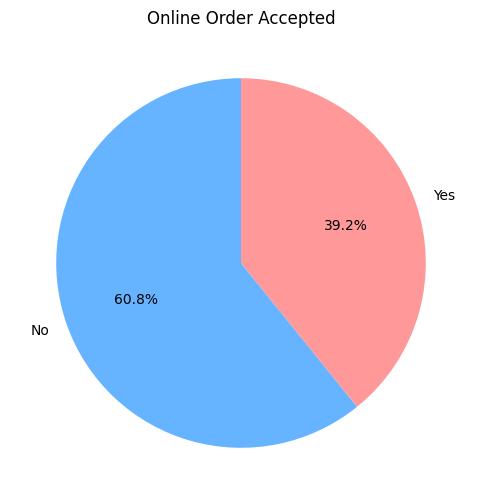

In [12]:
online_counts = df['online_order'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(online_counts,
        labels=online_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff', '#ff9999'])
plt.title('Online Order Accepted')
plt.show()

**Inference:** This suggests that a majority of the restaurants do not accept online orders.

### **Exploring Restaurant Types**

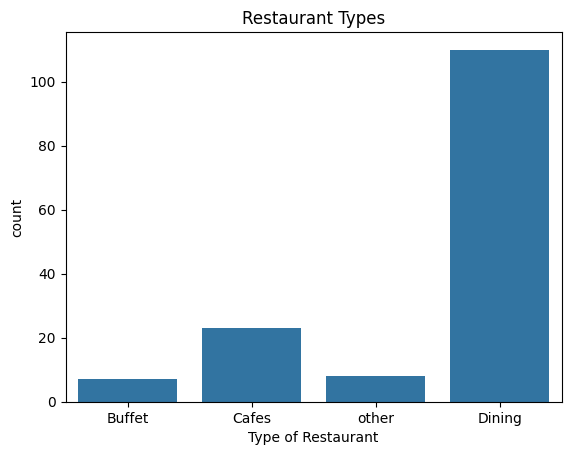

In [9]:
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("Type of Restaurant")
plt.title("Restaurant Types")
plt.show()

**Inference:** The majority of the restaurants fall into the dining category.

### **Votes by Restaurant Type**

Text(0, 0.5, 'Votes')

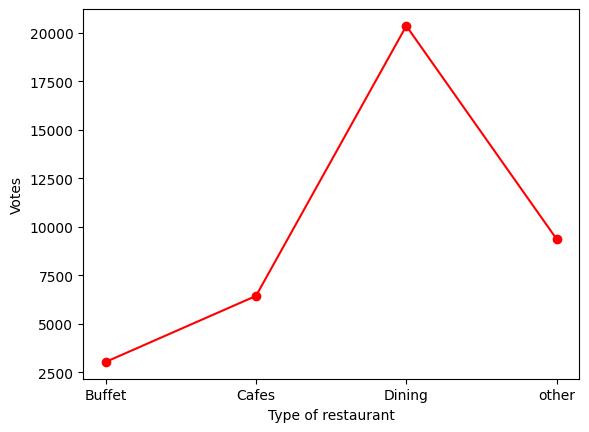

In [14]:
grp = df.groupby('listed_in(type)')['votes'].sum()
res = pd.DataFrame({'votes':grp})
plt.plot(res, c='red', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

**Inference:** Dining restaurants are preferred by a larger number of individuals.

### **Which type tends to be more liked per restaurant?**

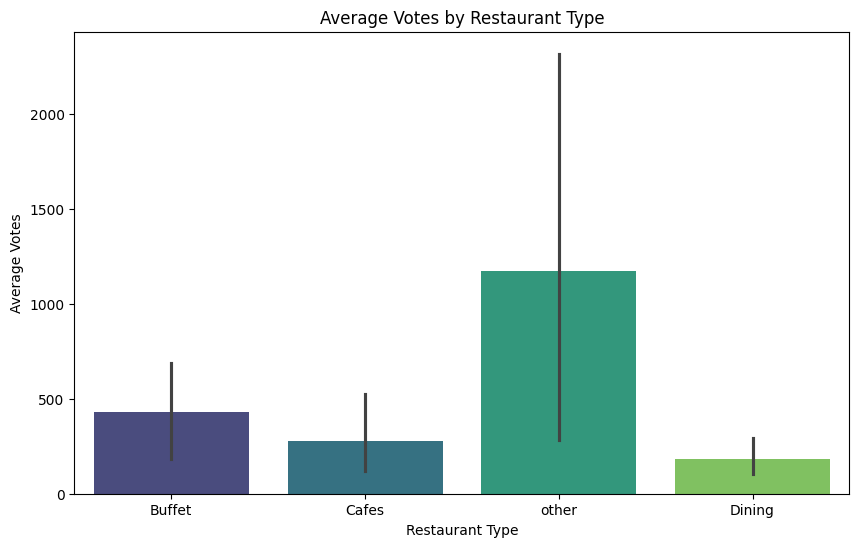

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='listed_in(type)', y='votes', hue = 'listed_in(type)', data=df, estimator='mean', palette='viridis', legend=False)
plt.title('Average Votes by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Votes')
plt.show()

**Inference:** Dining restaurants are preferred by mojority of individuals, but each gets fewer votes on average.

### **Identify the Most Voted Restaurant**

In [19]:
max_votes = df["votes"].max()
max_votes_rest = df.loc[df['votes']==max_votes, 'name']
print('Restaurant(s) with the maximum votes:')
print(max_votes_rest)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


### **Analyze Ratings**

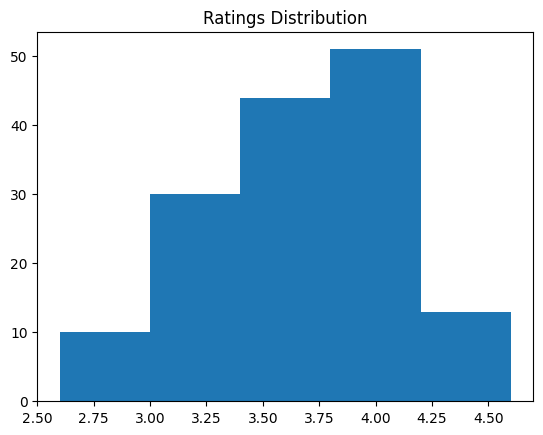

In [21]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

**Inference:** The majority of restaurants received ratings ranging from 3.5 to 4.

### **Approximate Cost for Couples**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

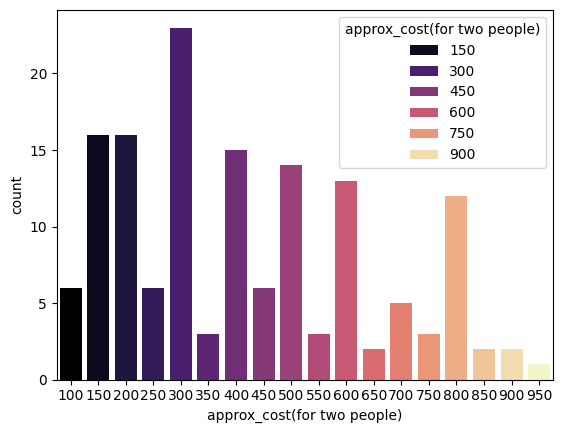

In [30]:
sns.countplot(x=df['approx_cost(for two people)'], hue = df['approx_cost(for two people)'], palette = 'magma')

**Inference:** The majority of couples prefer restaurants with an approximate cost of 300 rupees.

### **Ratings Comparison - Online vs Offline Orders**

<Axes: xlabel='online_order', ylabel='rate'>

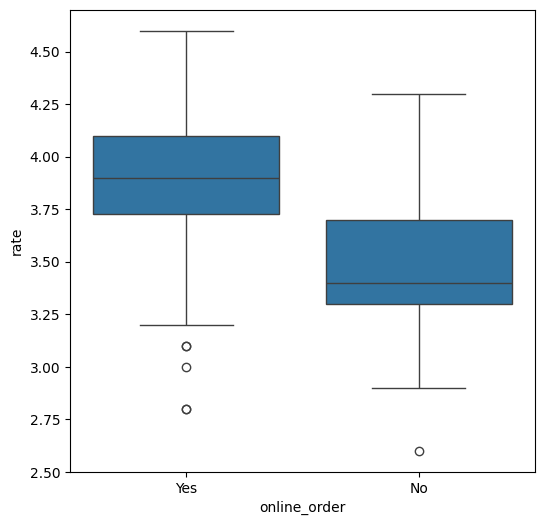

In [32]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

**Inference:** Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.

### **Order Mode Preferences by Restaurant Type**

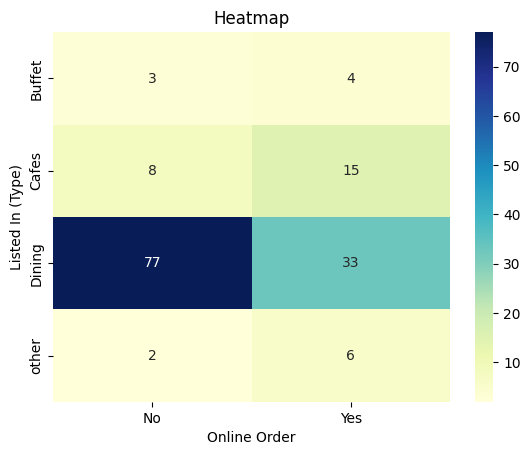

In [33]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

**Inference:** With this we can say that dining restaurants primarily accept offline orders whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.